In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('display.max_rows', None)

In [33]:
train_df=pd.read_csv("train.csv")
train_df.head(10)
#train_df[train_df['Book-ID']=='BOOK_077238'][['Book-Title']]

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book
5,TRAIN_000005,USER_00000,BOOK_206799,5,23.0,"sackville, new brunswick, canada",Neuromancer (Remembering Tomorrow),William Gibson,1995.0,Ace Books
6,TRAIN_000006,USER_00000,BOOK_239414,9,23.0,"sackville, new brunswick, canada",The Little Prince,Antoine de Saint-ExupÃ©ry,1982.0,Harvest Books
7,TRAIN_000007,USER_00000,BOOK_269070,0,23.0,"sackville, new brunswick, canada",Forests of the Heart (Newford),Charles de Lint,2001.0,Tor Books
8,TRAIN_000008,USER_00001,BOOK_190739,7,35.0,"wake forest, north carolina, usa",Self Matters : Creating Your Life from the Ins...,Phillip C. McGraw,2001.0,Free Press
9,TRAIN_000009,USER_00001,BOOK_210079,0,35.0,"wake forest, north carolina, usa",The Self Matters Companion : Helping You Creat...,Phillip C. McGraw,2002.0,Free Press


In [5]:
df[df['Location'].str.startswith((',', '&', '%'))]['Location']

38085                         , ,
70126                      , usa,
104085       , massachusetts, usa
104086       , massachusetts, usa
104087       , massachusetts, usa
                   ...           
797930    , herts, united kingdom
797931    , herts, united kingdom
797932    , herts, united kingdom
797933    , herts, united kingdom
806584                 , , norway
Name: Location, Length: 244, dtype: object

In [8]:
#주소가 숫자 혹은 문자로 시작하지 않는 주소들을 출력

df[~df['Location'].str[0].str.isdigit() & ~df['Location'].str[0].str.isalpha()]['Location']

38085                                   , ,
54430             -, upper austria, austria
70126                                , usa,
99872      ................., michigan, usa
99873      ................., michigan, usa
                        ...                
856667    `t harde, gelderland, netherlands
856668    `t harde, gelderland, netherlands
856669    `t harde, gelderland, netherlands
856670    `t harde, gelderland, netherlands
856671    `t harde, gelderland, netherlands
Name: Location, Length: 596, dtype: object

In [9]:
#저자가 숫자 혹은 문자로 시작하지 않는 행 출력

df[~df['Book-Author'].str[0].str.isdigit() & ~df['Book-Author'].str[0].str.isalpha()]['Book-Author']

44603               "Pickles"
82489                  "Lulu"
140395              "Pickles"
154972              "Pickles"
189488              "Septima"
271458               D. Chiel
281975              "Pickles"
288406        "Family Circle"
360754              "Pickles"
408147              "Beshlie"
445770               D. Chiel
462729              "Pickles"
579807             "Time Out"
601825                  "Abu"
603158               D. Chiel
723164              "Pickles"
760140             "Goscinny"
785135    "Good Housekeeping"
825318               D. Chiel
Name: Book-Author, dtype: object

In [11]:
#출판사가 숫자 혹은 문자로 시작하지 않는 행 출력

df[~df['Publisher'].str[0].str.isdigit() & ~df['Publisher'].str[0].str.isalpha()][['Publisher']]

,Publisher
15317,Editions P. Terrail
76699,"""Otokar Kersovani"""
125381,"""Nauka"""
138879,[EdiÃ§Ãµes ASA]
237219,Tri-State Press
388414,[Distributed by] FundacÃ£o Oriente
426283,[distributed by] G. Stevens Pub
427769,[Distributed by] FundacÃ£o Oriente
545120,"""Nauka"""
565868,[Published for] the Crime Club [by] Collins


In [16]:
df[df['Publisher']==' Editions P. Terrail']['Publisher']

15317     Editions P. Terrail
Name: Publisher, dtype: object

In [19]:
df_clean_book=df[df['Book-Rating']!=0]

In [23]:
df_clean_book[df_clean_book['Book-Rating']==0]['Book-Rating']

Series([], Name: Book-Rating, dtype: int64)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   871393 non-null  object 
 1   User-ID              871393 non-null  object 
 2   Book-ID              871393 non-null  object 
 3   Book-Rating          871393 non-null  int64  
 4   Age                  871393 non-null  float64
 5   Location             871393 non-null  object 
 6   Book-Title           871393 non-null  object 
 7   Book-Author          871393 non-null  object 
 8   Year-Of-Publication  871393 non-null  float64
 9   Publisher            871393 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 66.5+ MB


In [6]:
df.columns

Index(['ID', 'User-ID', 'Book-ID', 'Book-Rating', 'Age', 'Location',
       'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher'],
      dtype='object')

In [8]:
df.Age

0         23.0
1         23.0
2         23.0
3         23.0
4         23.0
          ... 
871388    34.0
871389    35.0
871390    45.0
871391    43.0
871392    35.0
Name: Age, Length: 871393, dtype: float64

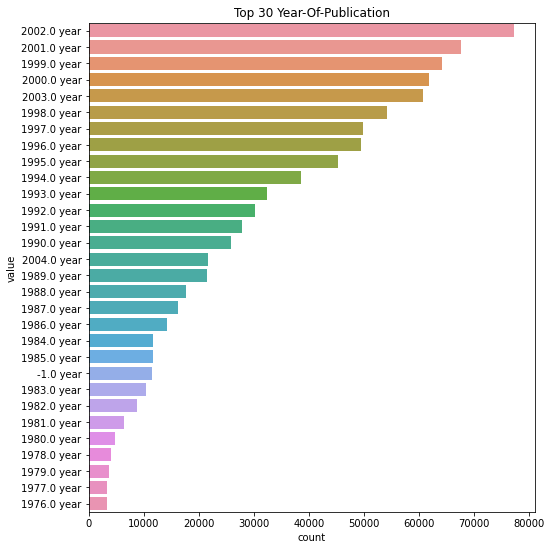

In [5]:
ds = df['Year-Of-Publication'].value_counts().reset_index()
ds.columns = ['value', 'count']
ds['value'] = ds['value'].astype(str) + ' year'
ds = ds.sort_values('count', ascending=False).head(100)

plt.figure(figsize=(8, 9))
sns.barplot(data=ds, x='count', y='value', orient='h')
plt.title('Top 30 Year-Of-Publication')
plt.show()

In [6]:
df[df['Year-Of-Publication'] == -1.0][['Book-Rating','Year-Of-Publication','Publisher']]

,Book-Rating,Year-Of-Publication,Publisher
184,0,-1.0,Scholastic Inc
186,10,-1.0,Scholastic Inc
191,0,-1.0,Scholastic Inc
231,0,-1.0,"Farrar, Straus Giroux"
290,0,-1.0,Faber Faber Inc
...,...,...,...
870700,5,-1.0,Faber Faber Inc
870751,0,-1.0,Penguin Putnam~trade
870776,8,-1.0,Bantam Doubleday Dell
870895,10,-1.0,Penguin Putnam~childrens Hc


In [14]:
df.dtypes

ID                      object
User-ID                 object
Book-ID                 object
Book-Rating              int64
Age                    float64
Location                object
Book-Title              object
Book-Author             object
Year-Of-Publication    float64
Publisher               object
dtype: object

In [7]:
df_drop_year=df[df['Year-Of-Publication'] != -1.0] #Year-Of-Publication값이 -1.0인 row drop


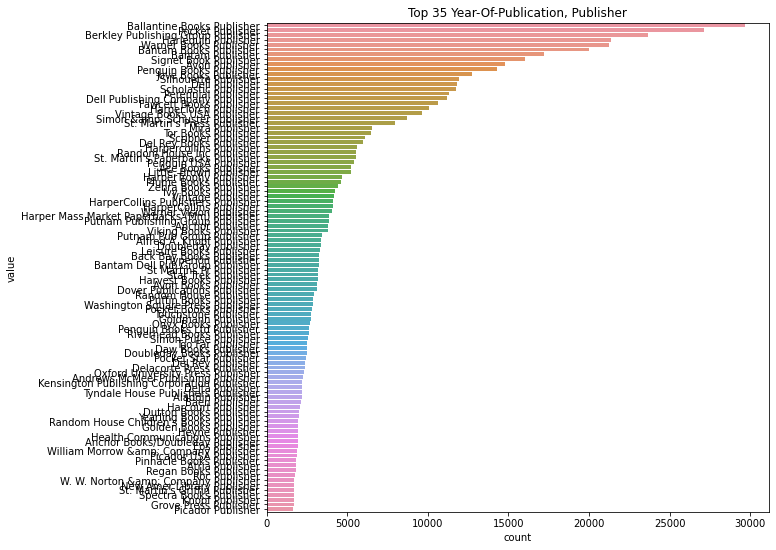

In [63]:
topYear = df_drop_year['Year-Of-Publication'].value_counts().reset_index()
topPublisher=df_drop_year['Publisher'].value_counts().reset_index()

topPublisher.columns=['value','count']
topYear.columns = ['value', 'count']

topYear['value'] = topYear['value'].astype(str) + ' year'
topYear = topYear.sort_values('count', ascending=False).head(100)

topPublisher['value']=topPublisher['value'].astype(str)+' Publisher'
topPublisher=topPublisher.sort_values('count',ascending=False).head(100)

combined_data = pd.concat([topYear, topPublisher])
# sns.barplot(data=combined_data, x='count', y='value', orient='h')
plt.figure(figsize=(9, 9))
# sns.barplot(data=topYear, x='count', y='value', orient='h')
sns.barplot(data=topPublisher,x='count',y='value',orient='h')


plt.title('Top 35 Year-Of-Publication, Publisher')
plt.show()

In [38]:
df_drop_year.shape #drop 후에 row의 수가 줄어든 것을 확인

(859878, 10)

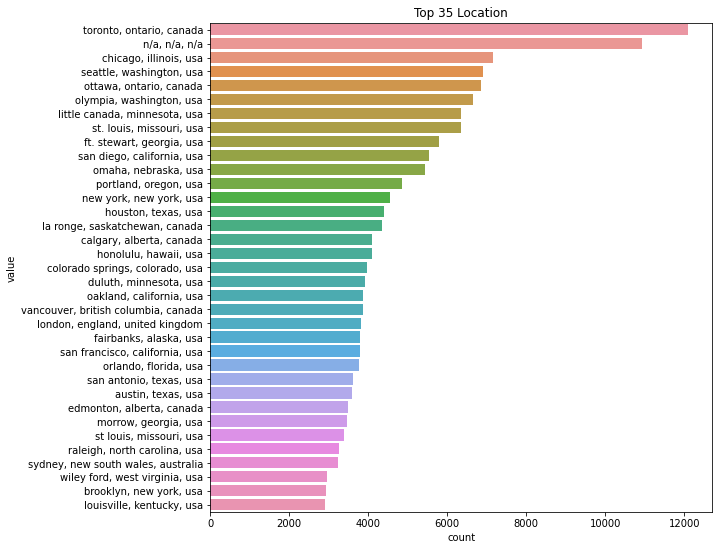

In [12]:
topLocation	 = df_drop_year['Location'].value_counts().reset_index()
topLocation.columns=['value','count']
topLocation['value'] = topLocation['value'].astype(str)
topLocation = topLocation.sort_values('count', ascending=False).head(35)

topLocation=topLocation.sort_values('count',ascending=False).head(100)

plt.figure(figsize=(9, 9))
sns.barplot(data=topLocation,x='count',y='value',orient='h')


plt.title('Top 35 Location')
plt.show()

In [18]:
df_drop_year.groupby('Location').agg(cnt=('Location', 'size'))

,cnt
Location,
"&#304;stanbul, n/a, turkey",1
"&#321;ód&#378;, &#322;ódzkie, poland",1
"&#321;ód&#378;, n/a, poland",1
"&#36149;&#28207;, &#24191;&#35199;, china",1
"***********, illinois, usa",113
...,...
"öhringen, baden-württemberg, germany",1
"örebro, n/a, sweden",1
"øverbygd, troms, norway",1


### 장소 top 100 제외하고 drop하기 

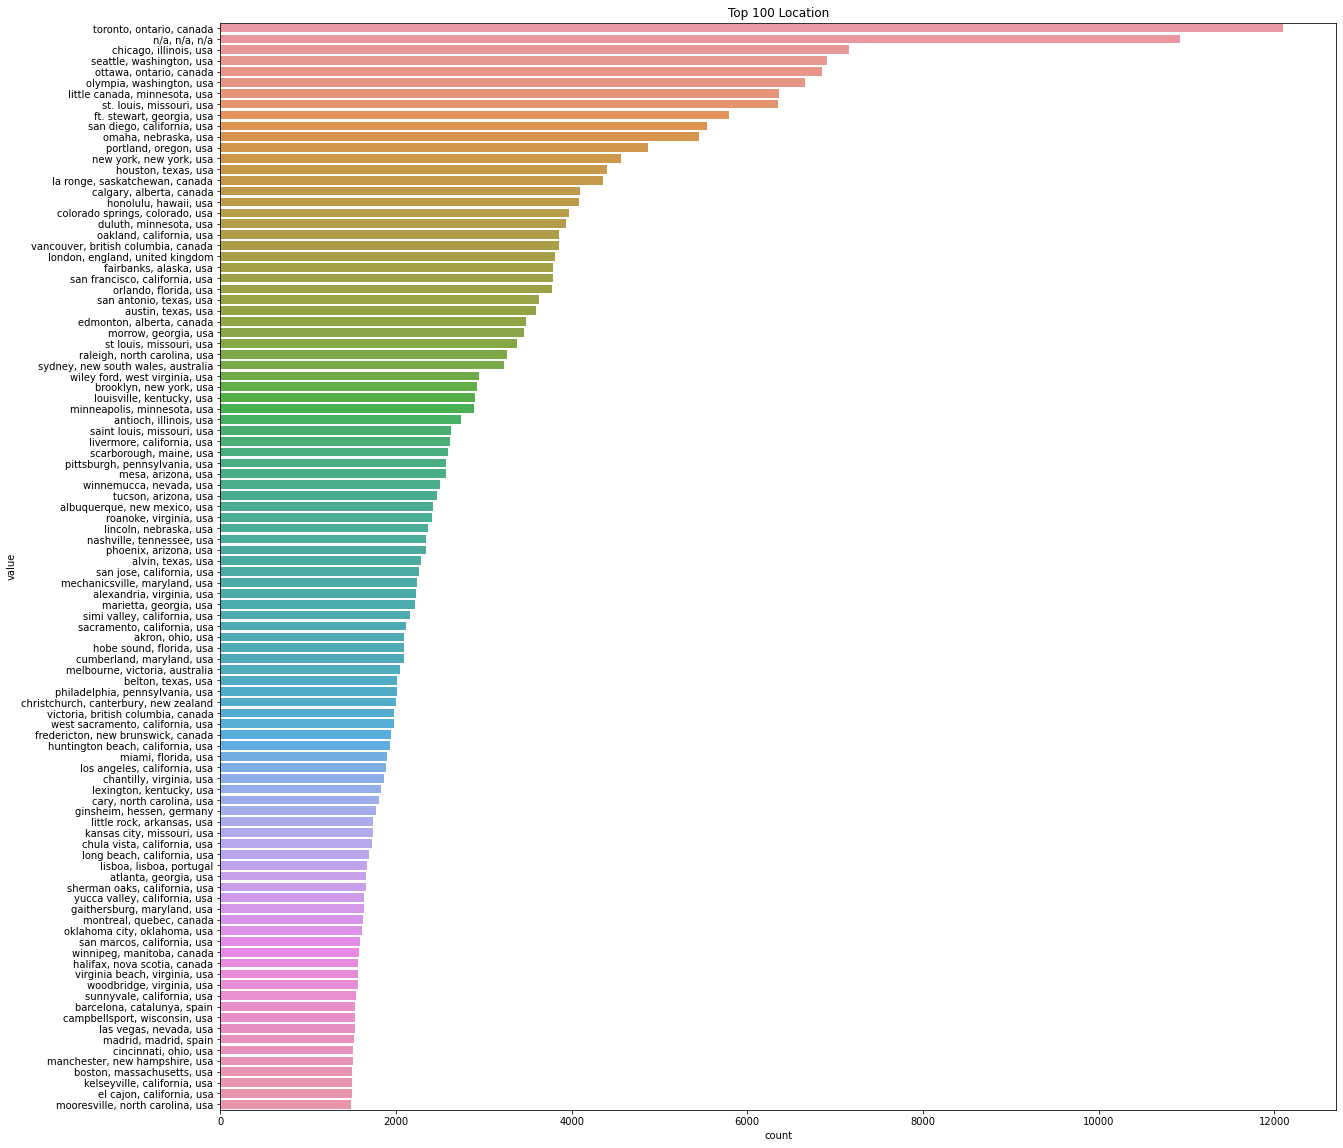

In [64]:
topLocation	 = df_drop_year['Location'].value_counts().reset_index()
topLocation.columns=['value','count']
topLocation['value'] = topLocation['value'].astype(str)

topLocation=topLocation.sort_values('count',ascending=False).head(100)

plt.figure(figsize=(20, 20))
sns.barplot(data=topLocation,x='count',y='value',orient='h')


plt.title('Top 100 Location')
plt.show()

In [65]:
# 장소가 n/a값이 아닌 것들만 df_drop_location에 넣어줌
# df_drop_location에는 year가 -1.0이 아니며, location이 n/a값이 아닌 애들만 있음
df_drop_location=df_drop_year[df_drop_year['Location'] != 'n/a, n/a, n/a']

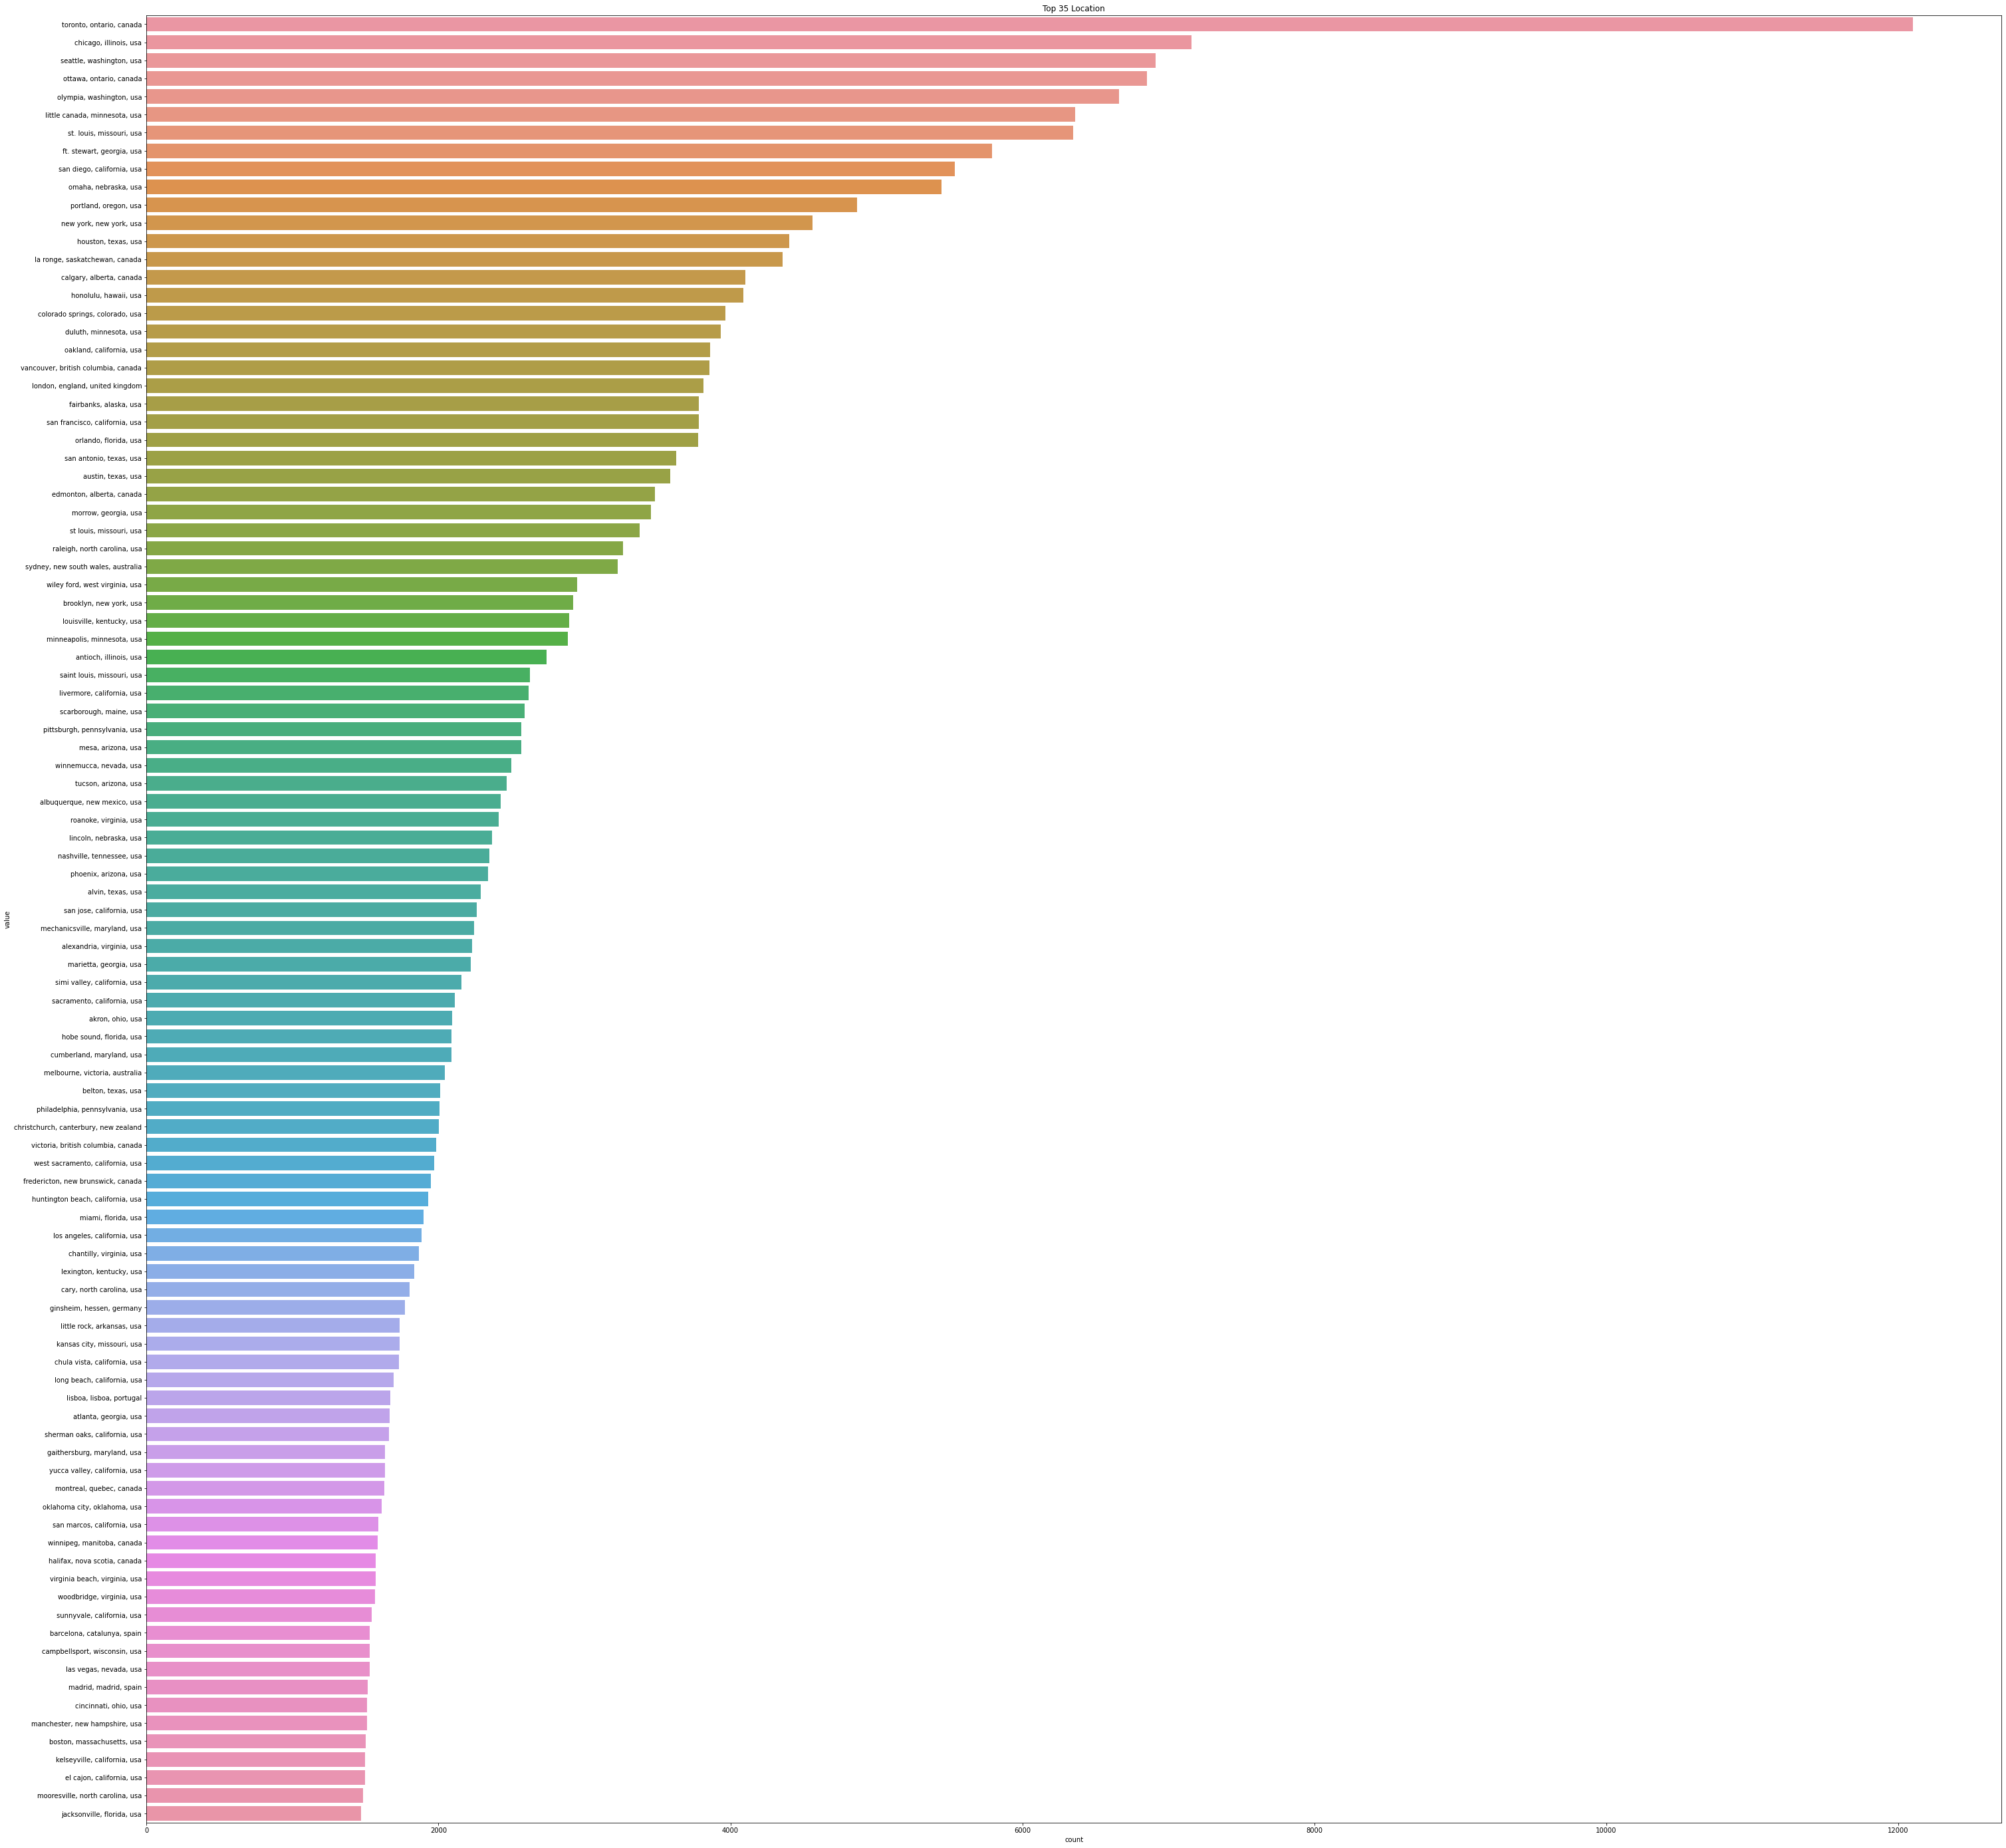

In [66]:
topLocation	 = df_drop_location['Location'].value_counts().reset_index()
topLocation.columns=['value','count']
topLocation['value'] = topLocation['value'].astype(str)
topLocation = topLocation.sort_values('count', ascending=False).head(100)


plt.figure(figsize=(50, 50))
sns.barplot(data=topLocation,x='count',y='value',orient='h')


plt.title('Top 35 Location')
plt.show()

In [70]:
topLocation.shape

(100, 2)

In [68]:
topPublisher

,value,count
0,Ballantine Books Publisher,29673
1,Pocket Publisher,27150
2,Berkley Publishing Group Publisher,23643
3,Harlequin Publisher,21362
4,Warner Books Publisher,21235
5,Bantam Books Publisher,20023
6,Bantam Publisher,17224
7,Signet Book Publisher,16016
8,Avon Publisher,14797
9,Penguin Books Publisher,14293


In [69]:
topYear

,value,count
0,2002.0 year,77173
1,2001.0 year,67566
2,1999.0 year,64175
3,2000.0 year,61749
4,2003.0 year,60744
5,1998.0 year,54102
6,1997.0 year,49881
7,1996.0 year,49373
8,1995.0 year,45345
9,1994.0 year,38644


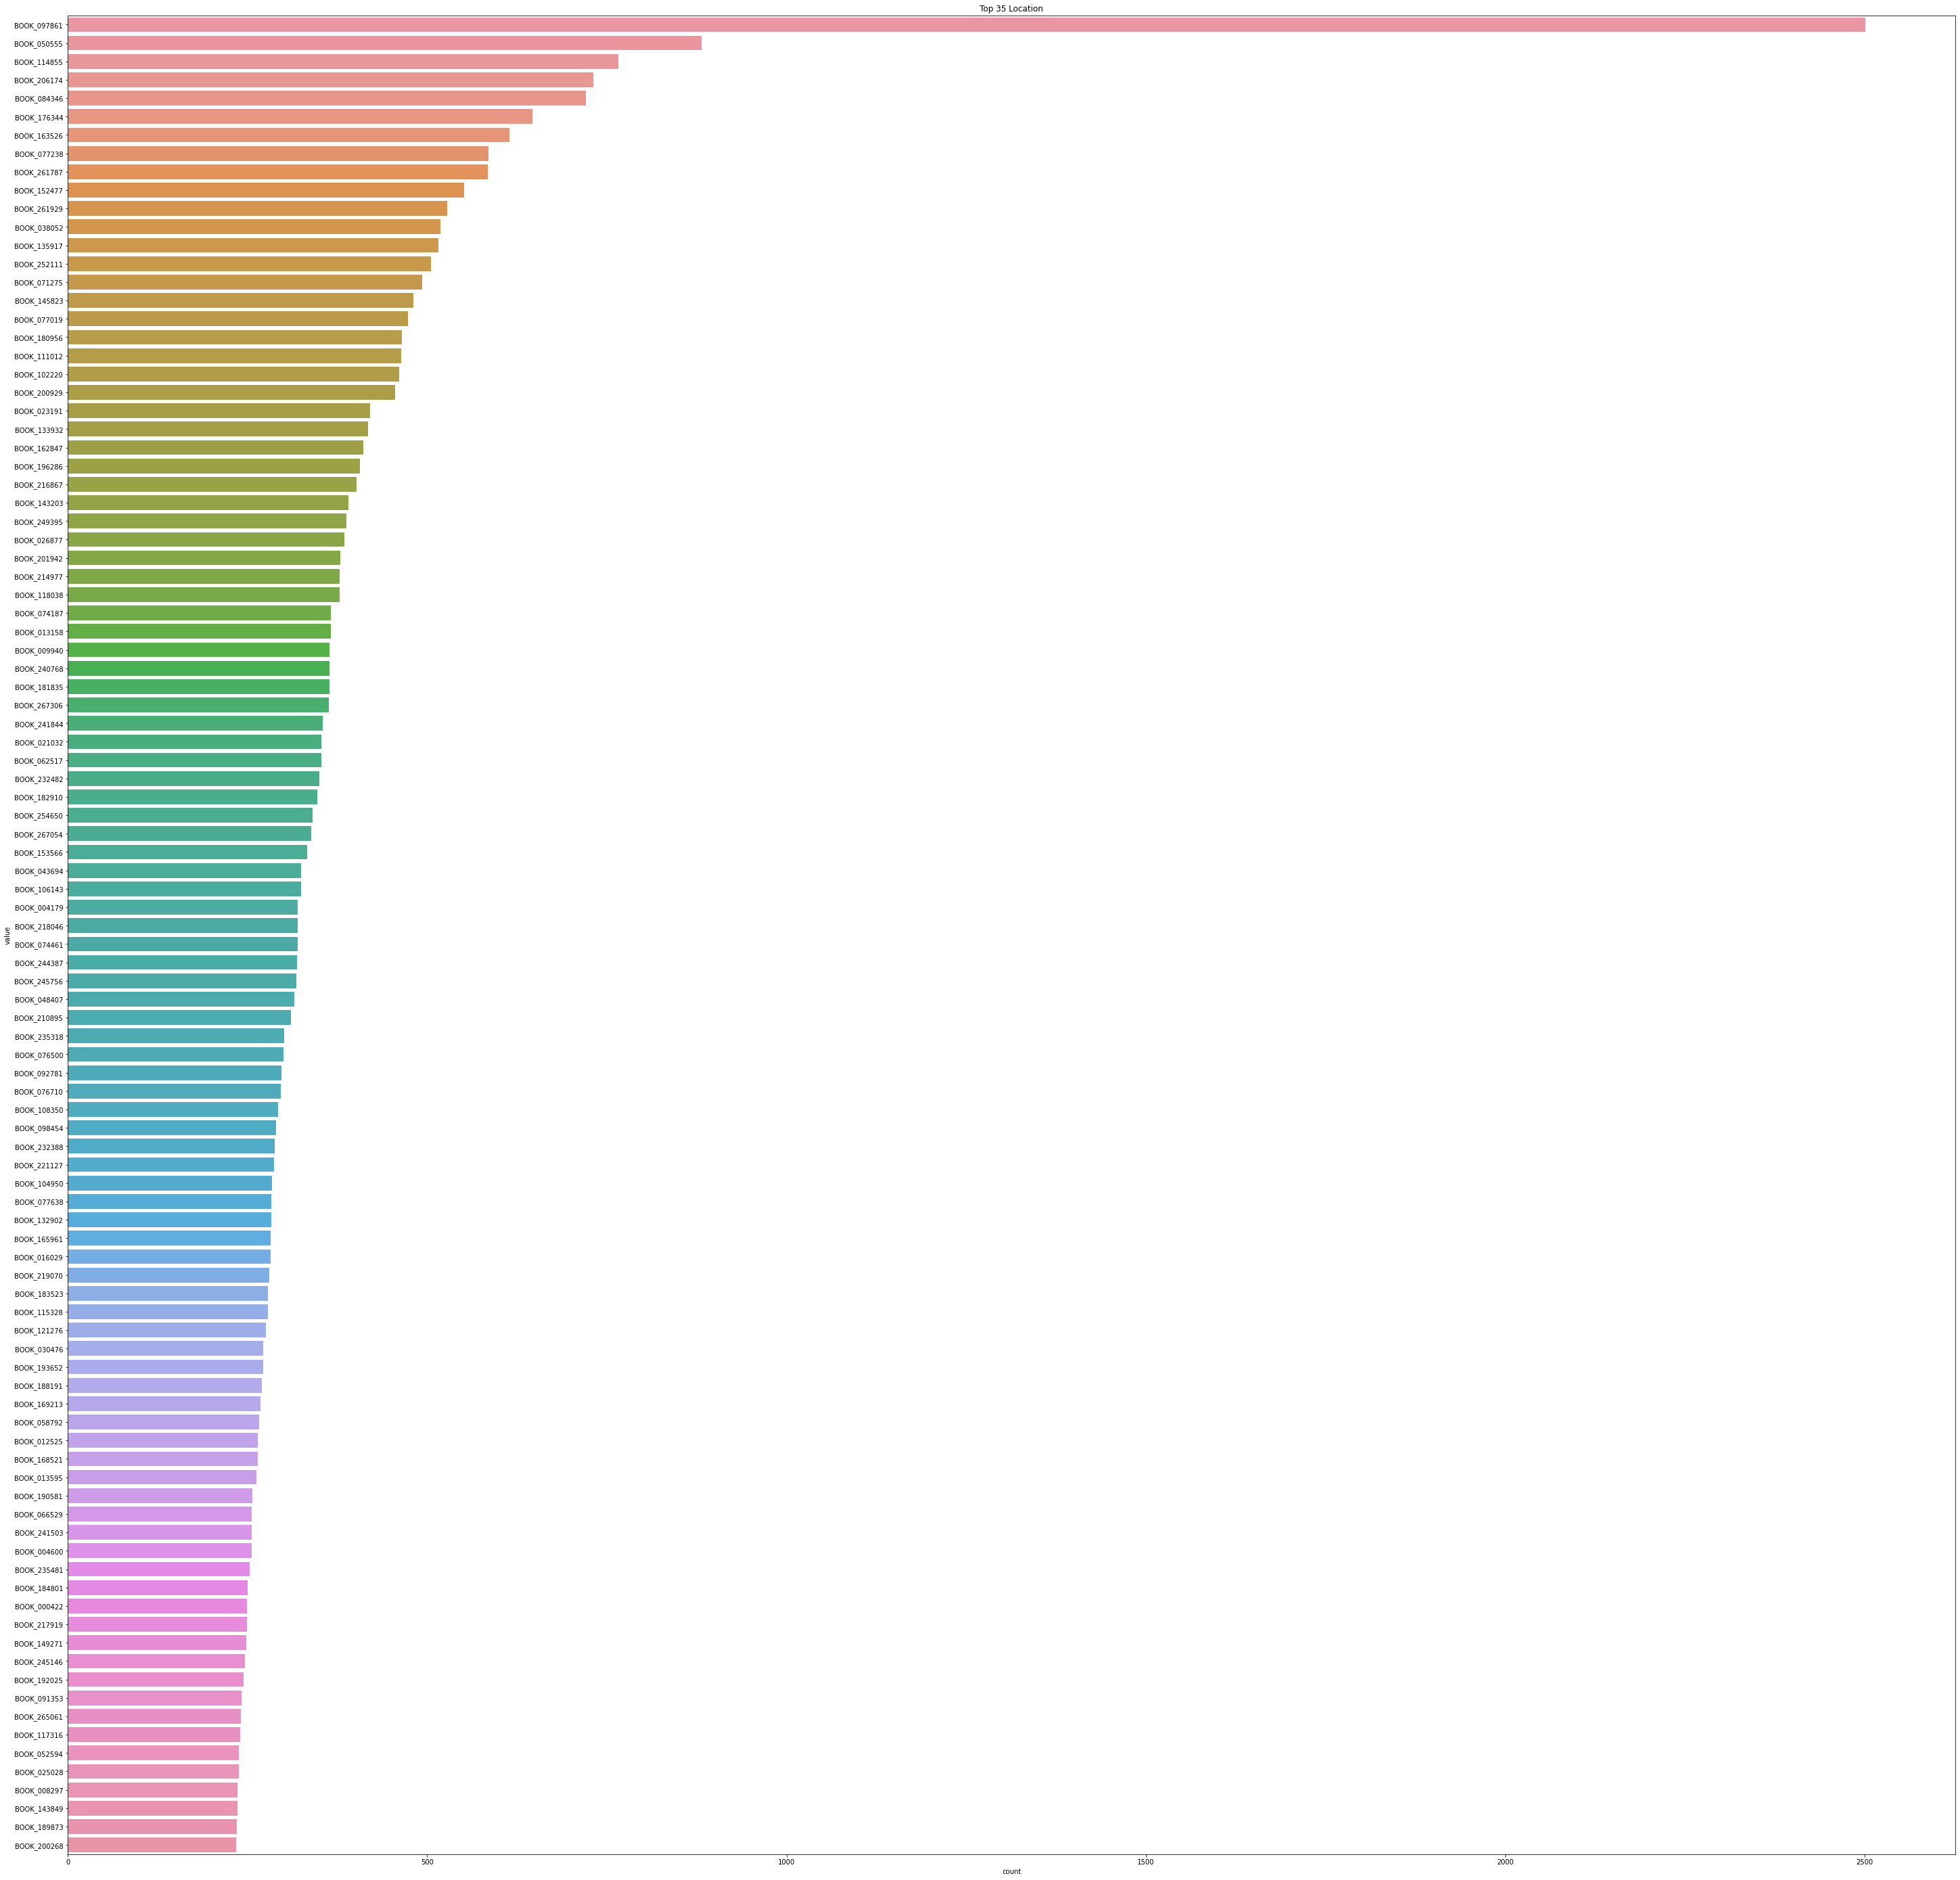

In [73]:
topBook= df_drop_location['Book-ID'].value_counts().reset_index()
topBook.columns=['value','count']
topBook['value'] = topBook['value'].astype(str)
topBook = topBook.sort_values('count', ascending=False).head(100)


plt.figure(figsize=(50, 50))
sns.barplot(data=topBook,x='count',y='value',orient='h')


plt.title('Top 35 Location')
plt.show()

In [74]:
topBook

,value,count
0,BOOK_097861,2501
1,BOOK_050555,882
2,BOOK_114855,766
3,BOOK_206174,731
4,BOOK_084346,721
5,BOOK_176344,646
6,BOOK_163526,614
7,BOOK_077238,585
8,BOOK_261787,584
9,BOOK_152477,551
